In [1]:
import numpy as np
from scipy.stats import linregress

In [2]:
# 生成一些模拟数据
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 5, 4])
 
# 使用最小二乘法进行线性拟合
slope, intercept, r_value, p_value, std_err = linregress(x, y)
 
# 输出拟合的直线方程
print(f"拟合的直线方程: y = {slope} * x + {intercept}")

拟合的直线方程: y = 0.8 * x + 0.5999999999999996


拟合结果： a = 0.9499999999998909, b = 0.0800000000001745


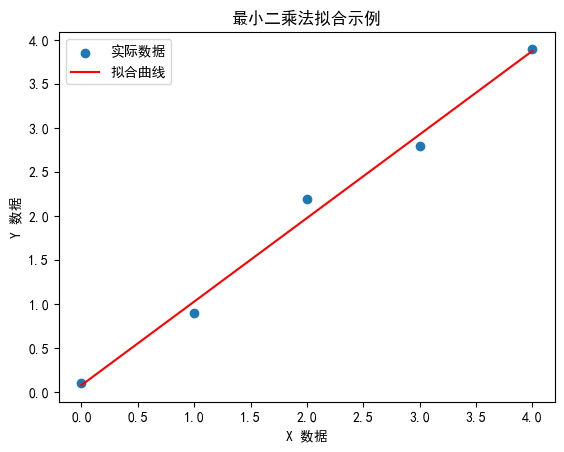

In [5]:
import numpy as np
from scipy.optimize import leastsq

# 示例数据
x_data = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
y_data = np.array([0.1, 0.9, 2.2, 2.8, 3.9])

# 需要拟合的函数模型，例如线性模型 y = a*x + b
def model_func(params, x):
    a, b = params
    return a * x + b

# 误差函数，即实际数据与模型预测值之间的差
def error_func(params, x, y):
    return model_func(params, x) - y

# 初始参数猜测值
initial_guess = [1.0, 0.0]

# 使用最小二乘法拟合
params_fit, success = leastsq(error_func, initial_guess, args=(x_data, y_data))

# 输出拟合的参数
a_fit, b_fit = params_fit
print(f"拟合结果： a = {a_fit}, b = {b_fit}")

# 可选：绘制拟合曲线
import matplotlib.pyplot as plt
# 解决中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['SimHei']

plt.scatter(x_data, y_data, label='实际数据')
plt.plot(x_data, model_func(params_fit, x_data), label='拟合曲线', color='red')
plt.legend()
plt.xlabel('X 数据')
plt.ylabel('Y 数据')
plt.title('最小二乘法拟合示例')
plt.show()


拟合结果： a = 3.5803776742767557, b = 1.8905609273495072, c = -1.6044961195605876, d = 0.49212701437306705, e = -0.3606712355652889


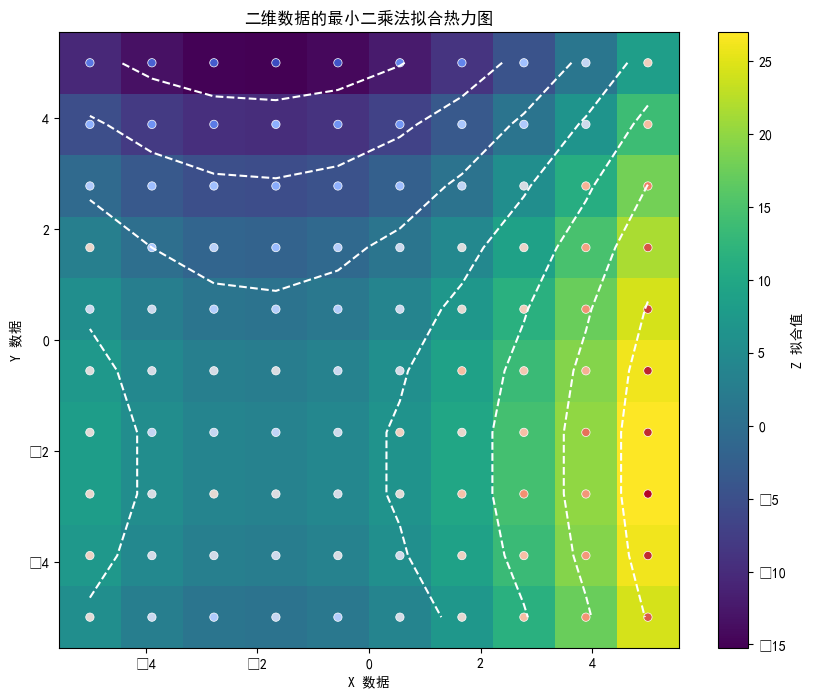

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

# 生成二维数据
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
X, Y = np.meshgrid(x, y)

# 创建模拟数据
Z_true = 3.0 + 2.0*X - 1.5*Y + 0.5*X**2 - 0.3*Y**2 + np.random.normal(scale=2.0, size=X.shape)

# 将二维数据展平为一维数组
x_data = X.flatten()
y_data = Y.flatten()
z_data = Z_true.flatten()

# 需要拟合的函数模型，这里假设是二次多项式 z = a + bx + cy + dx^2 + ey^2
def model_func(params, x, y):
    a, b, c, d, e = params
    return a + b*x + c*y + d*x**2 + e*y**2

# 误差函数
def error_func(params, x, y, z):
    return model_func(params, x, y) - z

# 初始参数猜测值
initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0]

# 使用最小二乘法拟合
params_fit, success = leastsq(error_func, initial_guess, args=(x_data, y_data, z_data))

# 输出拟合的参数
a_fit, b_fit, c_fit, d_fit, e_fit = params_fit
print(f"拟合结果： a = {a_fit}, b = {b_fit}, c = {c_fit}, d = {d_fit}, e = {e_fit}")

# 计算拟合曲面
Z_fit = model_func(params_fit, X, Y)

# 绘制热力图
plt.figure(figsize=(10, 8))
plt.pcolormesh(X, Y, Z_fit, shading='auto', cmap='viridis')
plt.colorbar(label='Z 拟合值')
plt.contour(X, Y, Z_fit, colors='white', linestyles='dashed')
plt.scatter(x_data, y_data, c=z_data, cmap='coolwarm', edgecolors='w', linewidth=0.5)
plt.xlabel('X 数据')
plt.ylabel('Y 数据')
plt.title('二维数据的最小二乘法拟合热力图')
plt.show()


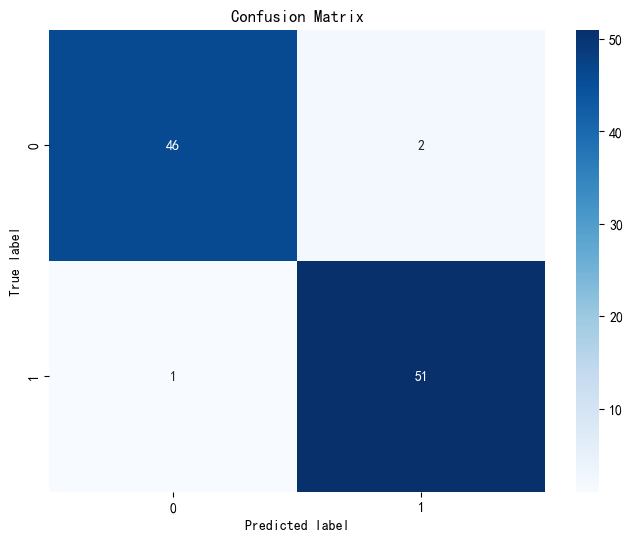

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 生成示例数据
np.random.seed(0)
X = np.random.rand(100, 2)  # 100个样本，每个样本有两个特征
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # 分类标签：如果x1 + x2 > 1，则标签为1，否则为0

# 添加偏置项
X = np.hstack([np.ones((X.shape[0], 1)), X])

# 最小二乘法拟合线性分类模型
def model_func(params, X):
    return X @ params

def error_func(params, X, y):
    return model_func(params, X) - y

initial_guess = np.zeros(X.shape[1])
params_fit, _ = leastsq(error_func, initial_guess, args=(X, y))

# 进行预测
y_pred = (model_func(params_fit, X) > 0.5).astype(int)

# 计算混淆矩阵
cm = confusion_matrix(y, y_pred)

# 绘制混淆矩阵热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 创建一个模拟的分类数据集
X, y = make_classification(n_samples=100, n_features=10, n_classes=3, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立并拟合PLS-DA模型
plsda = PLSRegression(n_components=2)
plsda.fit(X_train, y_train)

# 在训练集上进行预测
y_pred_train = plsda.predict(X_train)
y_pred_train_labels = y_pred_train.argmax(axis=1)

# 计算混淆矩阵
cm_train = confusion_matrix(y_train, y_pred_train_labels)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Training Confusion Matrix - PLS-DA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

ValueError: n_classes(3) * n_clusters_per_class(2) must be smaller or equal 2**n_informative(2)=4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# 创建一个模拟的分类数据集
X, y = make_classification(n_samples=100, n_features=10, n_classes=3, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 将目标变量转换为哑变量
onehot = OneHotEncoder()
y_train_onehot = onehot.fit_transform(y_train.reshape(-1, 1)).toarray()

# 建立并拟合PLS-DA模型
plsda = PLSRegression(n_components=2)
plsda.fit(X_train, y_train_onehot)

# 在训练集上进行预测
y_pred_train = plsda.predict(X_train)
y_pred_train_labels = y_pred_train.argmax(axis=1)

# 计算混淆矩阵
cm_train = confusion_matrix(y_train, y_pred_train_labels)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Training Confusion Matrix - PLS-DA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ValueError: n_classes(3) * n_clusters_per_class(2) must be smaller or equal 2**n_informative(2)=4